# Contributions of up- and downgoing TM- and TE-modes.

**IMPORTANT:** To calculate the TM/TE-split results you need to install `empyscripts` in addition to `empymod`, as the TM/TE-split function is an add-on and not in `empymod`. (To install `empyscripts` you just do the same as when you installed `empymod`, simply replacing `empymod` with `empyscripts` in the commands.)

This example is taken from the CSEM-book (Ziolkowski and Slob). Have a look at the CSEM-book repository for many more examples.

In [1]:
import numpy as np                      # NumPy
import matplotlib.pyplot as plt         # Matplotlib
from matplotlib import rcParams         # To adjust some plot settings

from empymod import dipole              # Load required empymod functions
from empyscripts.tmtemod import dipole as tmte

# Plot-style adjustments
%matplotlib inline
plt.style.use('ggplot')
rcParams['figure.dpi'] = 300
rcParams['savefig.dpi'] = 300
rcParams['text.usetex'] = True
rcParams['font.serif'] = 'Computer Modern Roman'
rcParams['font.family'] = 'serif'
rcParams['font.style'] = 'normal'

## Model parameters

In [2]:
# Offsets
x = np.linspace(10, 1.5e4, 128)

# Resistivity model
rtg = [2e14, 1/3, 1, 70, 1]  # With target
rhs = [2e14, 1/3, 1, 1, 1]   # Half-space

# Common model parameters (deep sea parameters)
model = {'src': [0, 0, 975],              # Source location
         'rec': [x, x*0, 1000],           # Receiver location
         'depth': [0, 1000, 2000, 2040],  # Depths: 1 km water layer, target 40 m thick 1 km below seabottom
         'freqtime': 0.5,                 # Frequencies
         'verb': 1}                       # Verbosity

## Calculation

In [3]:
target = dipole(res=rtg, **model)
tgTM, tgTE = tmte(res=rtg, **model)

# Without reservoir
notarg = dipole(res=rhs, **model)
ntTM, ntTE = tmte(res=rhs, **model)

## Figure 1

Plot all reflected contributions (without direct field), for the models with and without a reservoir.

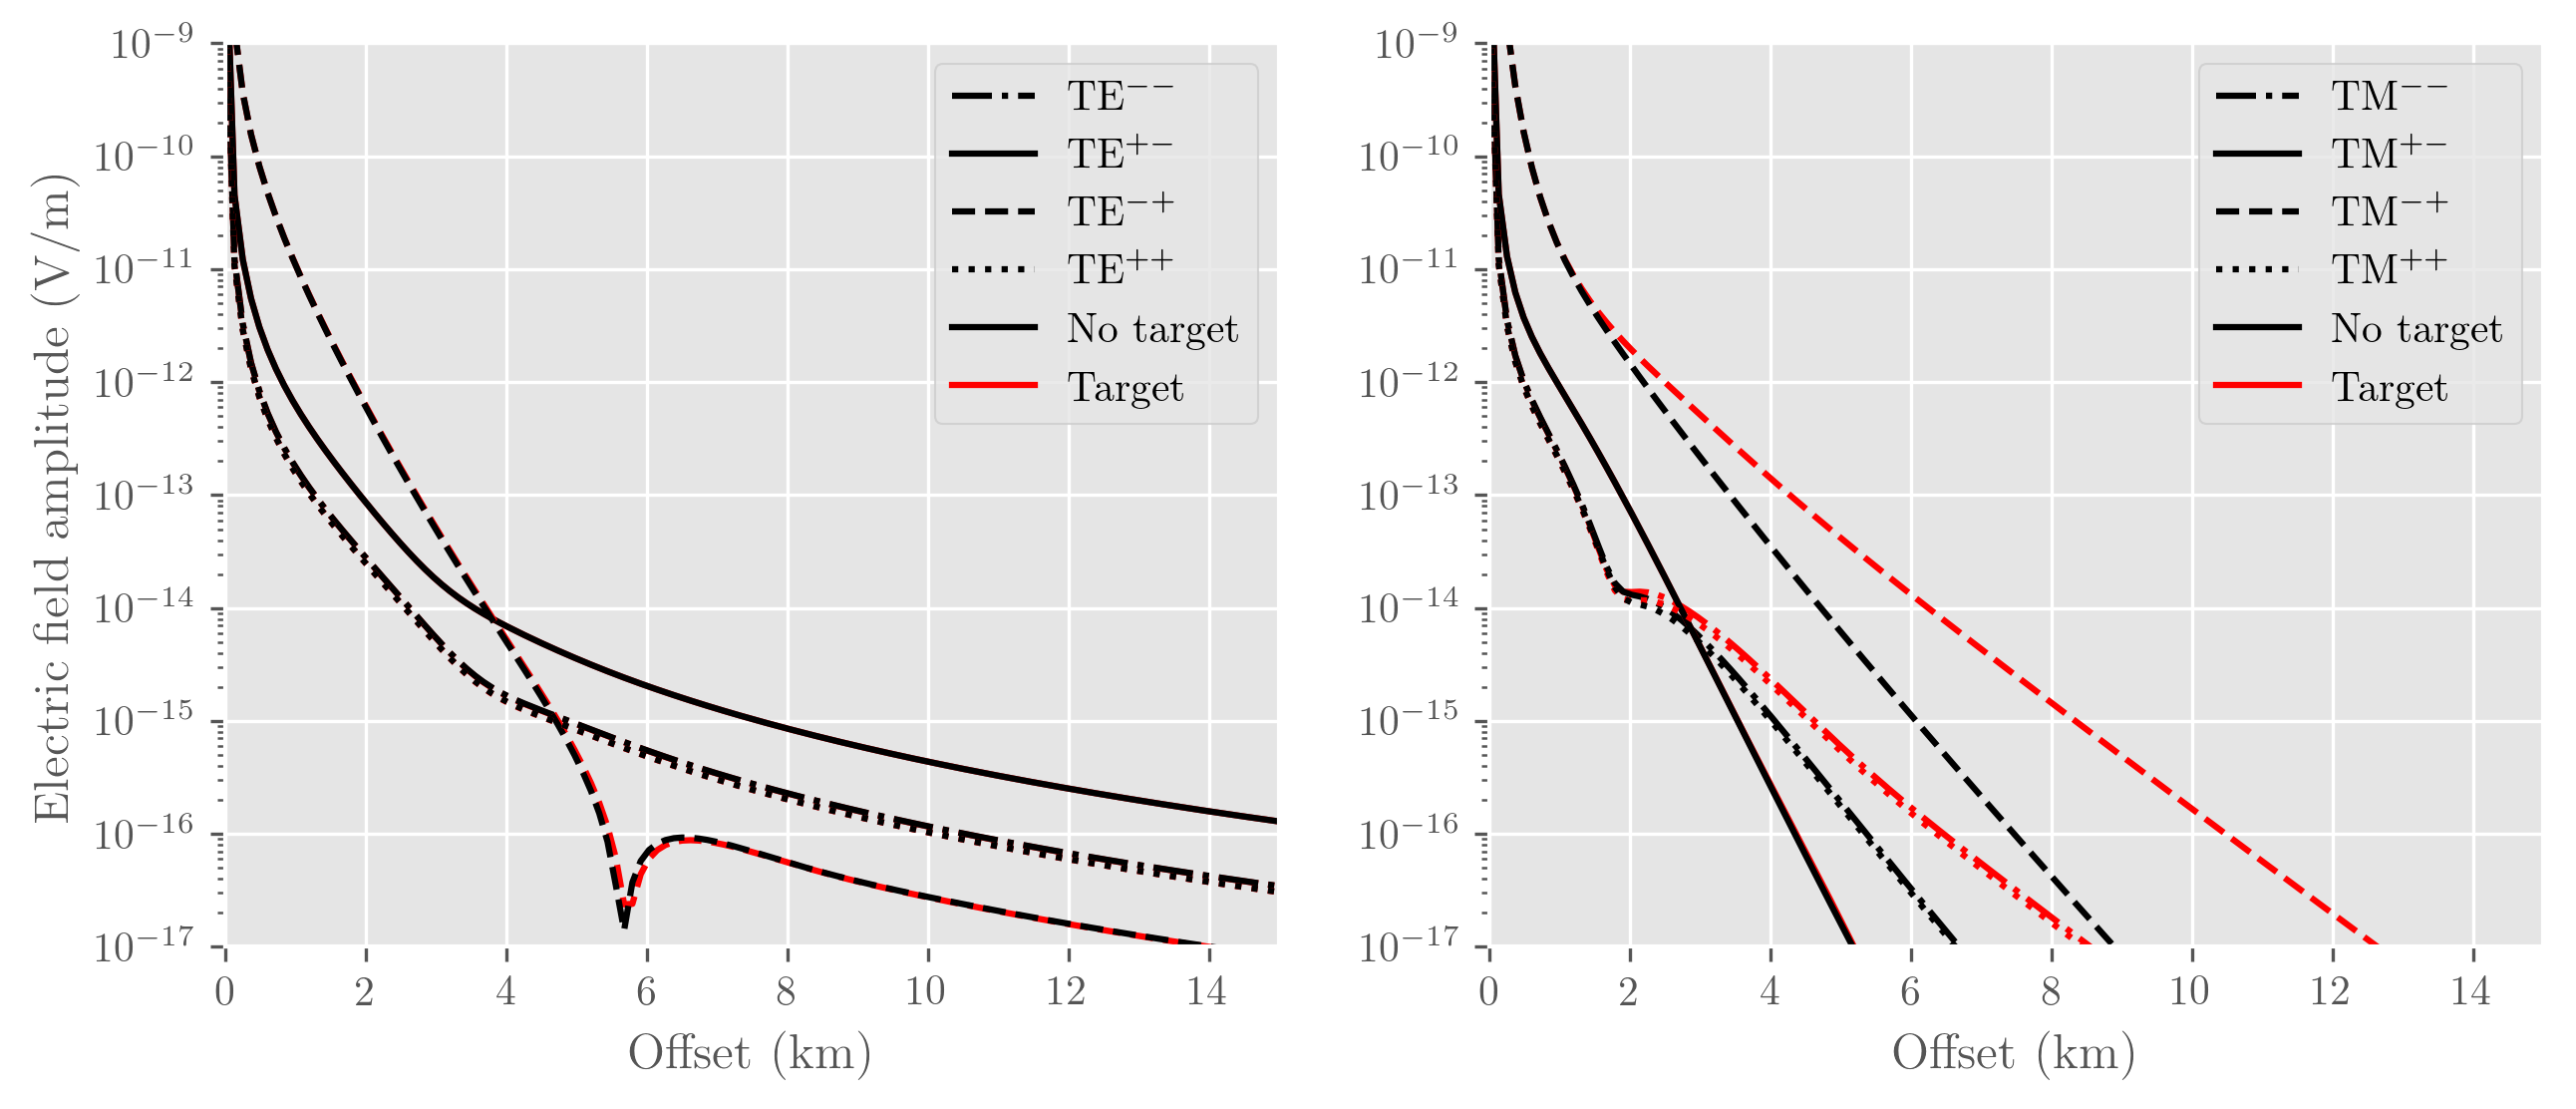

In [4]:
plt.figure(figsize=(10, 4))

# 1st subplot
ax1 = plt.subplot(121)
plt.semilogy(x/1000, np.abs(tgTE[0]), 'r-.')
plt.semilogy(x/1000, np.abs(ntTE[0]), 'k-.', label='TE$^{--}$')
plt.semilogy(x/1000, np.abs(tgTE[2]), 'r-')
plt.semilogy(x/1000, np.abs(ntTE[2]), 'k-', label='TE$^{+-}$')
plt.semilogy(x/1000, np.abs(tgTE[1]), 'r--')
plt.semilogy(x/1000, np.abs(ntTE[1]), 'k--', label='TE$^{-+}$')
plt.semilogy(x/1000, np.abs(tgTE[3]), 'r:')
plt.semilogy(x/1000, np.abs(ntTE[3]), 'k:', label='TE$^{++}$')
plt.semilogy(-1, 1, 'k-', label='No target')  # Dummy entries for labels
plt.semilogy(-1, 1, 'r-', label='Target')     # "
plt.legend()
plt.xlabel('Offset (km)')
plt.ylabel('Electric field amplitude (V/m)')
plt.xlim([0, 15])

# 2nd subplot
plt.subplot(122, sharey=ax1)
plt.semilogy(x/1000, np.abs(tgTM[0]), 'r-.')
plt.semilogy(x/1000, np.abs(ntTM[0]), 'k-.', label='TM$^{--}$')
plt.semilogy(x/1000, np.abs(tgTM[2]), 'r-')
plt.semilogy(x/1000, np.abs(ntTM[2]), 'k-', label='TM$^{+-}$')
plt.semilogy(x/1000, np.abs(tgTM[1]), 'r--')
plt.semilogy(x/1000, np.abs(ntTM[1]), 'k--', label='TM$^{-+}$')
plt.semilogy(x/1000, np.abs(tgTM[3]), 'r:')
plt.semilogy(x/1000, np.abs(ntTM[3]), 'k:', label='TM$^{++}$')
plt.semilogy(-1, 1, 'k-', label='No target')  # Dummy entries for labels
plt.semilogy(-1, 1, 'r-', label='Target')     # "
plt.legend()
plt.xlabel('Offset (km)')
plt.ylim([1e-17, 1e-9])
plt.xlim([0, 15])

plt.show()

The result shows that mainly the TM-mode contributions are sensitive to the reservoir. For TM, all modes contribute significantly except $T^{+-}$, which is the field that travels upwards from the source and downwards to the receiver.

## Figure 2

Finally we check if the result from `empymod.model.dipole` equals the sum of the output of `empyscripts.tmtemod.dipole`.

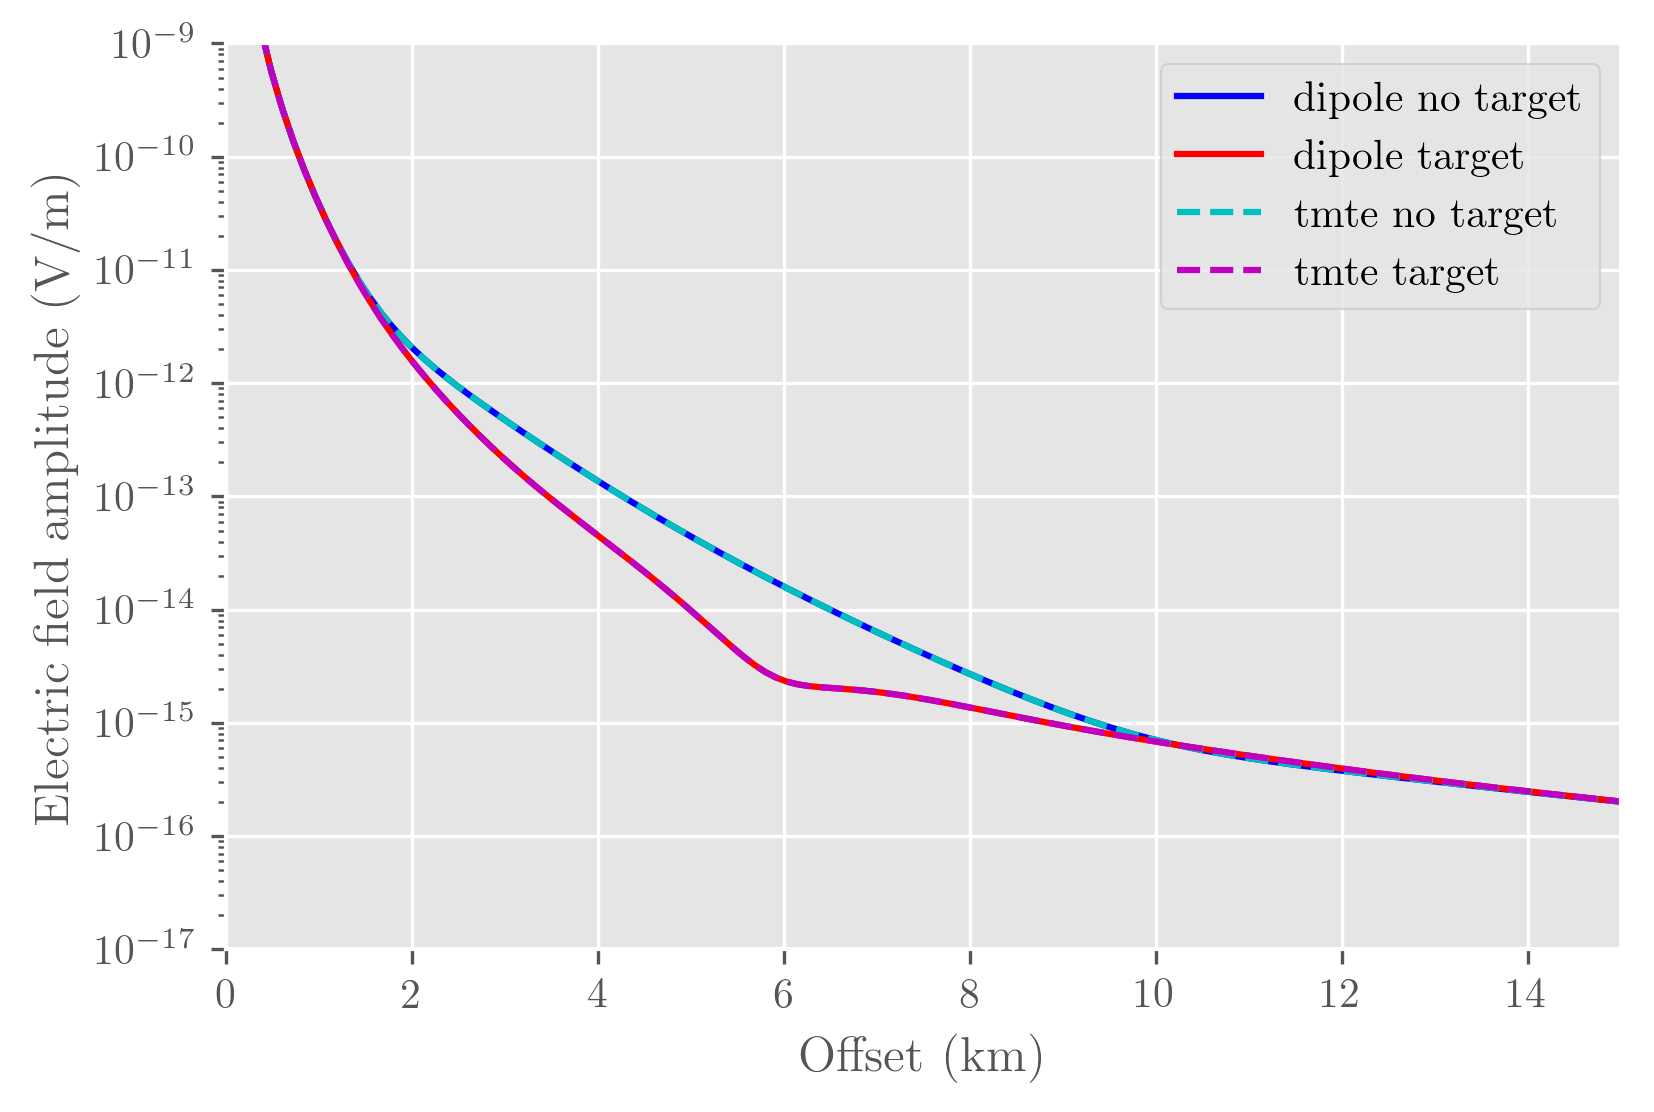

In [5]:
plt.figure()

nt = ntTM[0]+ntTM[1]+ntTM[2]+ntTM[3]+ntTM[4]+ntTE[0]+ntTE[1]+ntTE[2]+ntTE[3]+ntTE[4]
tg = tgTM[0]+tgTM[1]+tgTM[2]+tgTM[3]+tgTM[4]+tgTE[0]+tgTE[1]+tgTE[2]+tgTE[3]+tgTE[4]

plt.semilogy(x/1000, np.abs(target), 'b-', label='dipole no target')
plt.semilogy(x/1000, np.abs(notarg), 'r-', label='dipole target')
plt.semilogy(x/1000, np.abs(tg), 'c--', label='tmte no target')
plt.semilogy(x/1000, np.abs(nt), 'm--', label='tmte target')
plt.legend()
plt.xlabel('Offset (km)')
plt.ylabel('Electric field amplitude (V/m)')
plt.ylim([1e-17, 1e-9])
plt.xlim([0, 15])

plt.show()

In [6]:
import printinfo
printinfo.info()